### Datasets exploration

In [1]:
import os 
os.environ['CUDA_VISIBLE_DEVICES']='4'

In [2]:
import pandas as pd
import time
import datasets
import numpy as np
from tqdm import tqdm
import os
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from datasets import list_datasets, load_dataset, list_metrics, load_metric


/home/mbugueno/anaconda3/envs/py38_torch111/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from graph_utils import *

In [5]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize

#### IMDB

In [44]:
data_imdb = load_dataset('imdb')
df_train_imdb=from_dataset2df("imdb", data_imdb['train'], ['text','label'])
df_train_imdb.head()

Reusing dataset imdb (/home/mbugueno/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)
100%|███████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 666.29it/s]


,content,label
15235,Other than Susan Hayward's wooden delivery thr...,1
3723,By 1976 the western was an exhausted genre and...,0
9837,"I remember this film, exhibit in Barcelona (Sp...",0
16785,I think Charlotte Gainsbourg is one of the bes...,1
5917,"To say that Thunderbirds is a horrid, forced, ...",0


In [46]:
print ("Total samples:\n", df_train_imdb.shape[0])
print ("\nLabel distribution:\n", Counter(df_train_imdb['label']))
tokenized_imdb = [word_tokenize(sample) for sample in df_train_imdb['content']]
lens_imdb = [len(x) for x in tokenized_imdb]


Total samples:
 25000

Label distribution:
 Counter({1: 12500, 0: 12500})


In [47]:
imdbs=np.asarray(lens_imdb)
print ("\nLength of text (w.r.t. #tokens per document):")
print ("Min:", np.min(imdbs), "\tAverage:", np.mean(imdbs),"\tMax:",np.max(imdbs))

np.save('LengthOfText_imdb.npy', np.asarray(lens_imdb))


Length of text (w.r.t. #tokens per document):
Min: 11 	Average: 282.61188 	Max: 2818


In [48]:
long= np.sum([True for lens_im in lens_imdb if lens_im > 512])
long

2998

In [49]:
long/ len(lens_imdb)  # %long 512

0.11992

In [50]:
slong= np.sum([True for lens_im in lens_imdb if lens_im > 1024]) # %long 1024
print (slong)
slong/len(lens_imdb)


356


0.01424

In [17]:
start = time.time()

voc_text=set()
tokenized_imdb_set=[set(text) for text in tokenized_imdb]
for text in tokenized_imdb_set:
    voc_text = voc_text | set(text)

print ("\nVocabulary size (nltk):", len(voc_text))

end = time.time()
total_time = end - start
print("\nRunning time: "+ str(total_time))


Vocabulary size (nltk): 132100

Running time: 115.12339162826538


In [9]:
from preprocessing import * 
from joblib import Parallel, delayed

cleaned = Parallel(n_jobs=-1)(delayed(clean_str)(document, preprocess="soft") for document in df_train_imdb['content'])
tokenized_imdb_cleaned = [word_tokenize(document) for document in cleaned]
        
lens_imdb_cleaned = [len(x) for x in tokenized_imdb_cleaned]

imdbs_pro=np.asarray(lens_imdb_cleaned)
print ("\nLength of text (w.r.t. #tokens per document):")
print ("Min:", np.min(imdbs_pro), "\tAverage:", np.mean(imdbs_pro),"\tMax:",np.max(imdbs_pro))

start = time.time()

voc_text_pro=set()
tokenized_imdb_set_pro=[set(text) for text in tokenized_imdb_cleaned]
for text in tokenized_imdb_set_pro:
    voc_text_pro = voc_text_pro | set(text)

print ("\nVocabulary size preprocessed text (nltk):", len(voc_text_pro))

end = time.time()
total_time = end - start
print("\nRunning time: "+ str(total_time))


Length of text (w.r.t. #tokens per document):
Min: 4 	Average: 125.11364 	Max: 1455

Vocabulary size preprocessed text (nltk): 74325

Running time: 57.84554052352905


In [12]:
cleaned = Parallel(n_jobs=-1)(delayed(clean_text)(document, as_TLGCN=True) for document in df_train_imdb['content'])
tokenized_imdb_cleaned_as = [word_tokenize(document) for document in cleaned]
        
lens_imdb_cleaned_as = [len(x) for x in tokenized_imdb_cleaned_as]

imdbs_pro=np.asarray(lens_imdb_cleaned_as)
print ("\nLength of text (w.r.t. #tokens per document):")
print ("Min:", np.min(imdbs_pro), "\tAverage:", np.mean(imdbs_pro),"\tMax:",np.max(imdbs_pro))

start = time.time()

voc_text_pro=set()
tokenized_imdb_set_pro=[set(text) for text in tokenized_imdb_cleaned_as]
for text in tokenized_imdb_set_pro:
    voc_text_pro = voc_text_pro | set(text)

print ("\nVocabulary size preprocessed text as Text Level GCN (nltk):", len(voc_text_pro))

end = time.time()
total_time = end - start
print("\nRunning time: "+ str(total_time))


Length of text (w.r.t. #tokens per document):
Min: 8 	Average: 185.68116 	Max: 2094

Vocabulary size preprocessed text as Text Level GCN (nltk): 67326

Running time: 18.258984565734863


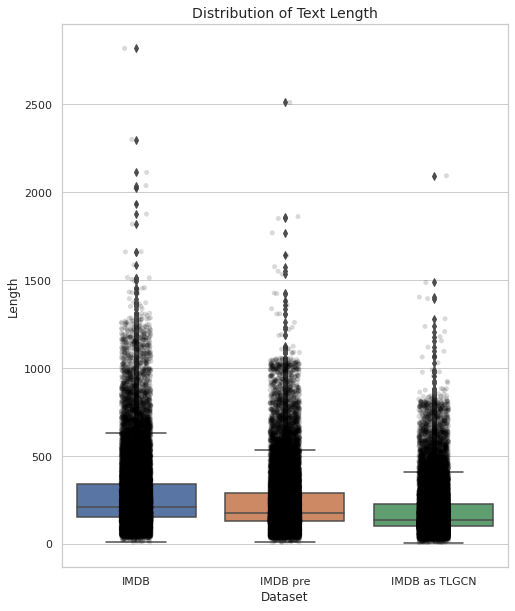

In [15]:
sns.set(rc={'figure.figsize':(8,10)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=(lens_imdb, lens_imdb_cleaned, lens_imdb_cleaned_as))
ax = sns.stripplot(data=(lens_imdb, lens_imdb_cleaned, lens_imdb_cleaned_as), marker="o", alpha=0.15, color="black")
ax.axes.set_title("Distribution of Text Length", fontsize=14)
ax.set_xlabel("Dataset", fontsize=12)
ax.set_ylabel("Length", fontsize=12)
ax.set_xticklabels(('IMDB','IMDB pre','IMDB as TLGCN'))
plt.show()

#### APP PRODUCTS

In [18]:
data_app = load_dataset('app_reviews')
df_train_app=from_dataset2df("app_reviews", data_app['train'], ['review', 'star'])
df_train_app.head()

Using custom data configuration default
Reusing dataset app_reviews (/home/mbugueno/.cache/huggingface/datasets/app_reviews/default/0.0.0/20335b51b604b9bc04b7be253cd8445caa9ba93f15f39a4b0492b9e9102853de)
100%|████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38.52it/s]


,content,label
95429,Fix it oK,3
179186,nilar,4
80504,Irritating... Need to update much more to be a...,0
274154,Better than Apple Store,4
250099,It's quite annoying that you need this app for...,0


In [20]:
print ("Total samples:\n", df_train_app.shape[0])
print ("\nLabel distribution:\n", Counter(df_train_app['label']))
tokenized_app = [word_tokenize(sample) for sample in df_train_app['content']]
lens_app = [len(x) for x in tokenized_app]

np.save('LengthOfText_app.npy', np.asarray(lens_app))

apps=np.asarray(lens_app)
print ("\nLength of text (#tokens):")
print ("Min:", np.min(apps), "\tAverage:", np.mean(apps),"\tMax:",np.max(apps))

Total samples:
 288065

Label distribution:
 Counter({4: 174374, 0: 39984, 3: 37247, 2: 23196, 1: 13264})

Length of text (#tokens):
Min: 1 	Average: 13.507430614618228 	Max: 568


In [22]:
long= np.sum([True for lens_a in lens_app if lens_a > 512])
print (long)
long/len(lens_app)

1


3.471438737784875e-06

In [23]:
start = time.time()

voc_text=set()
tokenized_app_set=[set(text) for text in tokenized_app]
for text in tokenized_app_set:
    voc_text = voc_text | set(text)

print ("\nVocabulary size (nltk):", len(voc_text))

end = time.time()
total_time = end - start
print("\nRunning time: "+ str(total_time))


Vocabulary size (nltk): 115886

Running time: 917.0249304771423


In [7]:
from preprocessing import * 
from joblib import Parallel, delayed

cleaned = Parallel(n_jobs=-1)(delayed(clean_text)(document) for document in df_train_app['content'])
tokenized_app_cleaned = [word_tokenize(document) for document in cleaned]
        
lens_app_cleaned = [len(x) for x in tokenized_app_cleaned]

apps_pro=np.asarray(lens_app_cleaned)
print ("\nLength of text (w.r.t. #tokens per document):")
print ("Min:", np.min(apps_pro), "\tAverage:", np.mean(apps_pro),"\tMax:",np.max(apps_pro))

start = time.time()

voc_text_pro=set()
tokenized_app_set_pro=[set(text) for text in tokenized_app_cleaned]
for text in tokenized_app_set_pro:
    voc_text_pro = voc_text_pro | set(text)

print ("\nVocabulary size preprocessed text (nltk):", len(voc_text_pro))

end = time.time()
total_time = end - start
print("\nRunning time: "+ str(total_time))


Length of text (w.r.t. #tokens per document):
Min: 1 	Average: 12.168239806988007 	Max: 710

Vocabulary size preprocessed text (nltk): 77158

Running time: 217.41865968704224


In [8]:

cleaned = Parallel(n_jobs=-1)(delayed(clean_text)(document, as_TLGCN=True) for document in df_train_app['content'])
tokenized_app_cleaned_as = [word_tokenize(document) for document in cleaned]
        
lens_app_cleaned_as = [len(x) for x in tokenized_app_cleaned_as]

apps_pro=np.asarray(lens_app_cleaned_as)
print ("\nLength of text (w.r.t. #tokens per document):")
print ("Min:", np.min(apps_pro), "\tAverage:", np.mean(apps_pro),"\tMax:",np.max(apps_pro))

start = time.time()

voc_text_pro=set()
tokenized_app_set_pro=[set(text) for text in tokenized_app_cleaned_as]
for text in tokenized_app_set_pro:
    voc_text_pro = voc_text_pro | set(text)

print ("\nVocabulary size preprocessed text as Text Level GCN (nltk):", len(voc_text_pro))

end = time.time()
total_time = end - start
print("\nRunning time: "+ str(total_time))


Length of text (w.r.t. #tokens per document):
Min: 0 	Average: 9.314172148647007 	Max: 686

Vocabulary size preprocessed text as Text Level GCN (nltk): 72812

Running time: 187.26170015335083


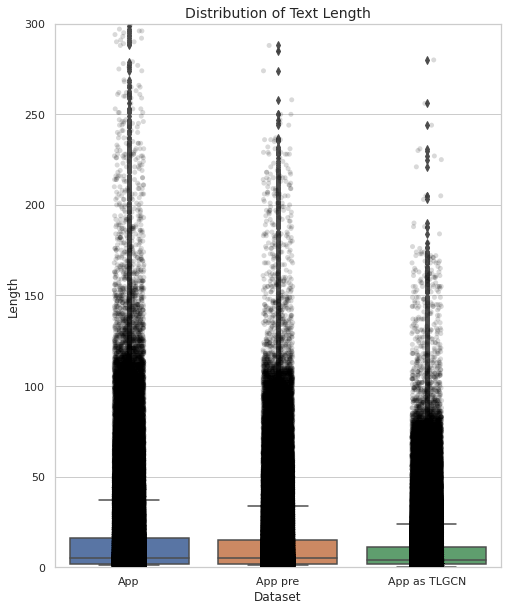

In [14]:
sns.set(rc={'figure.figsize':(8,10)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=(lens_app, lens_app_cleaned, lens_app_cleaned_as))
ax = sns.stripplot(data=(lens_app, lens_app_cleaned, lens_app_cleaned_as), marker="o", alpha=0.15, color="black")
ax.axes.set_title("Distribution of Text Length", fontsize=14)
ax.set_xlabel("Dataset", fontsize=12)
ax.set_ylabel("Length", fontsize=12)
ax.set_ylim(0,300)
ax.set_xticklabels(('App','App pre','App as TLGCN'))
plt.show()

#### DBPEDIA

In [24]:
data_db = load_dataset('dbpedia_14')
df_train_db=from_dataset2df("dbpedia_14", data_db['train'], ['content','label'])
df_train_db.head()

Reusing dataset dbpedia_14 (/home/mbugueno/.cache/huggingface/datasets/dbpedia_14/dbpedia_14/2.0.0/01dab9e10d969eadcdbc918be5a09c9190a24caeae33b10eee8f367a1e3f1f0c)
100%|████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 23.45it/s]


,content,label
467862,Cal is a soundtrack album by British singer-s...,11
381308,Policheta is a genus of flies in the family T...,9
200807,The SNCASE SE 100 was a French two-seat twin-...,5
426600,Guzmania foetida is a species of plant in the...,10
308868,Mount McNicoll is a mountain in the northern ...,7


In [26]:
print ("Total samples:\n", df_train_db.shape[0])
print ("Label distribution:\n", Counter(df_train_db['label']))
tokenized_db = [word_tokenize(sample) for sample in df_train_db['content']]
lens_db = [len(x) for x in tokenized_db]

np.save('LengthOfText_db.npy', np.asarray(lens_db))

dbs=np.asarray(lens_db)
print ("\nLength of text (#tokens):")
print ("Min:", np.min(dbs), "\tAverage:", np.mean(dbs),"\tMax:",np.max(dbs))

Total samples:
 560000
Label distribution:
 Counter({11: 40000, 9: 40000, 5: 40000, 10: 40000, 7: 40000, 3: 40000, 13: 40000, 1: 40000, 0: 40000, 6: 40000, 8: 40000, 4: 40000, 2: 40000, 12: 40000})

Length of text (#tokens):
Min: 1 	Average: 50.621075 	Max: 1498


In [27]:
long= np.sum([True for lens_d in lens_db if lens_d > 512])
print (long)
long/len(lens_db)

10


1.785714285714286e-05

In [42]:
list_vocabs=[]
num=int(len(tokenized_db)/20)
num_s=int(len(tokenized_db)/num)

for i in range(num_s+1):
    print ("Vocab for slice",i)
    voc_text=set()
    tokenized_db_set=[set(text) for text in tokenized_db[i*num:(i+1)*num]]
    for text in tokenized_db_set:
        voc_text = voc_text | set(text)
    list_vocabs.append(voc_text)

    print ("Part",i,"done")
    print ("Part", i,"vocabulary:", len(voc_text))

Vocab for slice 0
Part 0 done
Part 0 vocabulary: 120727
Vocab for slice 1
Part 1 done
Part 1 vocabulary: 120450
Vocab for slice 2
Part 2 done
Part 2 vocabulary: 119814
Vocab for slice 3
Part 3 done
Part 3 vocabulary: 120560
Vocab for slice 4
Part 4 done
Part 4 vocabulary: 121322
Vocab for slice 5
Part 5 done
Part 5 vocabulary: 121008
Vocab for slice 6
Part 6 done
Part 6 vocabulary: 121070
Vocab for slice 7
Part 7 done
Part 7 vocabulary: 121880
Vocab for slice 8
Part 8 done
Part 8 vocabulary: 120733
Vocab for slice 9
Part 9 done
Part 9 vocabulary: 120936
Vocab for slice 10
Part 10 done
Part 10 vocabulary: 119797
Vocab for slice 11
Part 11 done
Part 11 vocabulary: 120617
Vocab for slice 12
Part 12 done
Part 12 vocabulary: 121134
Vocab for slice 13
Part 13 done
Part 13 vocabulary: 120030
Vocab for slice 14
Part 14 done
Part 14 vocabulary: 120196
Vocab for slice 15
Part 15 done
Part 15 vocabulary: 120955
Vocab for slice 16
Part 16 done
Part 16 vocabulary: 121064
Vocab for slice 17
Part 17 

In [43]:
voc_text=set()
for set_text in list_vocabs:
    voc_text = voc_text | set(set_text)

print ("Complete vocabulary:", len(voc_text))

Complete vocabulary: 944153


In [33]:
from preprocessing import * 
from joblib import Parallel, delayed

cleaned = Parallel(n_jobs=-1)(delayed(clean_text)(document) for document in df_train_db['content'])
tokenized_db_cleaned = [word_tokenize(document) for document in cleaned]
        
lens_db_cleaned = [len(x) for x in tokenized_db_cleaned]

dbs_pro=np.asarray(lens_db_cleaned)
print ("\nLength of text (w.r.t. #tokens per document):")
print ("Min:", np.min(dbs_pro), "\tAverage:", np.mean(dbs_pro),"\tMax:",np.max(dbs_pro))



Length of text (w.r.t. #tokens per document):
Min: 0 	Average: 47.67852857142857 	Max: 1574


In [34]:
start = time.time()

list_vocabs=[]
num=int(len(tokenized_db_cleaned)/20)
num_s=int(len(tokenized_db_cleaned)/num)

for i in range(num_s+1):
    print ("Vocab for slice",i)
    voc_text=set()
    tokenized_db_set_pro=[set(text) for text in tokenized_db_cleaned[i*num:(i+1)*num]]
    for text in tokenized_db_set_pro:
        voc_text = voc_text | set(text)
    list_vocabs.append(voc_text)

    print ("Part",i,"done")
    print ("Part", i,"vocabulary:", len(voc_text))
    

end = time.time()
total_time = end - start
print("\nRunning time: "+ str(total_time))

Vocab for slice 0
Part 0 done
Part 0 vocabulary: 87994
Vocab for slice 1
Part 1 done
Part 1 vocabulary: 88486
Vocab for slice 2


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scip

Part 2 done
Part 2 vocabulary: 88197
Vocab for slice 3
Part 3 done
Part 3 vocabulary: 87676
Vocab for slice 4
Part 4 done
Part 4 vocabulary: 87991
Vocab for slice 5
Part 5 done
Part 5 vocabulary: 88197
Vocab for slice 6
Part 6 done
Part 6 vocabulary: 87567
Vocab for slice 7
Part 7 done
Part 7 vocabulary: 87776
Vocab for slice 8
Part 8 done
Part 8 vocabulary: 87443
Vocab for slice 9
Part 9 done
Part 9 vocabulary: 88293
Vocab for slice 10
Part 10 done
Part 10 vocabulary: 88165
Vocab for slice 11
Part 11 done
Part 11 vocabulary: 87510
Vocab for slice 12
Part 12 done
Part 12 vocabulary: 88267
Vocab for slice 13
Part 13 done
Part 13 vocabulary: 88010
Vocab for slice 14
Part 14 done
Part 14 vocabulary: 87917
Vocab for slice 15
Part 15 done
Part 15 vocabulary: 87607
Vocab for slice 16
Part 16 done
Part 16 vocabulary: 88004
Vocab for slice 17
Part 17 done
Part 17 vocabulary: 88151
Vocab for slice 18
Part 18 done
Part 18 vocabulary: 88183
Vocab for slice 19
Part 19 done
Part 19 vocabulary: 8780

In [35]:
voc_text_pro=set()
for set_text in list_vocabs:
    voc_text_pro = voc_text_pro | set(set_text)

print ("\nVocabulary size preprocessed text (nltk):", len(voc_text_pro))



Vocabulary size preprocessed text (nltk): 558849


In [36]:
cleaned = Parallel(n_jobs=-1)(delayed(clean_text)(document, as_TLGCN=True) for document in df_train_db['content'])
tokenized_db_cleaned_as = [word_tokenize(document) for document in cleaned]
        
lens_db_cleaned_as = [len(x) for x in tokenized_db_cleaned_as]

dbs_pro=np.asarray(lens_db_cleaned_as)
print ("\nLength of text (w.r.t. #tokens per document):")
print ("Min:", np.min(dbs_pro), "\tAverage:", np.mean(dbs_pro),"\tMax:",np.max(dbs_pro))



Length of text (w.r.t. #tokens per document):
Min: 0 	Average: 36.13983928571429 	Max: 1359


In [37]:
start = time.time()

list_vocabs=[]
num=int(len(tokenized_db_cleaned_as)/20)
num_s=int(len(tokenized_db_cleaned_as)/num)

for i in range(num_s+1):
    print ("Vocab for slice",i)
    voc_text=set()
    tokenized_db_set_pro=[set(text) for text in tokenized_db_cleaned_as[i*num:(i+1)*num]]
    for text in tokenized_db_set_pro:
        voc_text = voc_text | set(text)
    list_vocabs.append(voc_text)

    print ("Part",i,"done")
    print ("Part", i,"vocabulary:", len(voc_text))
    
end = time.time()
total_time = end - start
print("\nRunning time: "+ str(total_time))

Vocab for slice 0
Part 0 done
Part 0 vocabulary: 82843
Vocab for slice 1
Part 1 done
Part 1 vocabulary: 83264
Vocab for slice 2
Part 2 done
Part 2 vocabulary: 82979
Vocab for slice 3
Part 3 done
Part 3 vocabulary: 82504
Vocab for slice 4
Part 4 done
Part 4 vocabulary: 82814
Vocab for slice 5
Part 5 done
Part 5 vocabulary: 83017
Vocab for slice 6
Part 6 done
Part 6 vocabulary: 82407
Vocab for slice 7
Part 7 done
Part 7 vocabulary: 82598
Vocab for slice 8
Part 8 done
Part 8 vocabulary: 82268
Vocab for slice 9
Part 9 done
Part 9 vocabulary: 83088
Vocab for slice 10


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scip

Part 10 done
Part 10 vocabulary: 82982
Vocab for slice 11
Part 11 done
Part 11 vocabulary: 82394
Vocab for slice 12
Part 12 done
Part 12 vocabulary: 83078
Vocab for slice 13
Part 13 done
Part 13 vocabulary: 82797
Vocab for slice 14
Part 14 done
Part 14 vocabulary: 82809
Vocab for slice 15
Part 15 done
Part 15 vocabulary: 82486
Vocab for slice 16
Part 16 done
Part 16 vocabulary: 82880
Vocab for slice 17
Part 17 done
Part 17 vocabulary: 82922
Vocab for slice 18
Part 18 done
Part 18 vocabulary: 83033
Vocab for slice 19
Part 19 done
Part 19 vocabulary: 82673
Vocab for slice 20
Part 20 done
Part 20 vocabulary: 0

Running time: 465.8796329498291


In [38]:
voc_text_pro=set()
for set_text in list_vocabs:
    voc_text_pro = voc_text_pro | set(set_text)

print ("\nVocabulary size preprocessed text as Text Level GCN (nltk):", len(voc_text_pro))


Vocabulary size preprocessed text as Text Level GCN (nltk): 544076


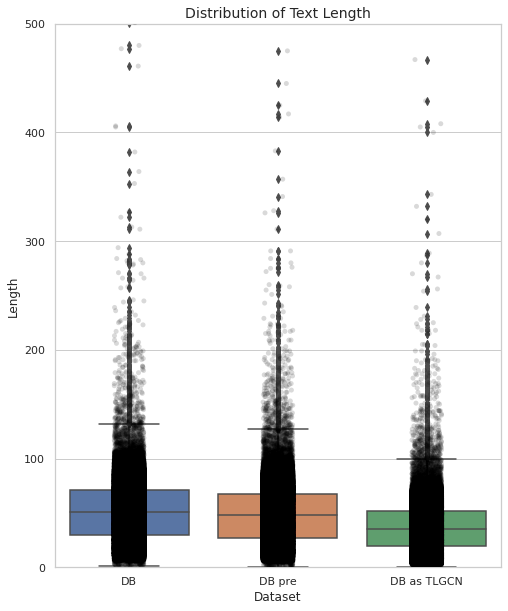

In [41]:
sns.set(rc={'figure.figsize':(8,10)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=(lens_db, lens_db_cleaned, lens_db_cleaned_as))
ax = sns.stripplot(data=(lens_db, lens_db_cleaned, lens_db_cleaned_as), marker="o", alpha=0.15, color="black")
ax.axes.set_title("Distribution of Text Length", fontsize=14)
ax.set_xlabel("Dataset", fontsize=12)
ax.set_ylabel("Length", fontsize=12)
ax.set_ylim(0,500)
ax.set_xticklabels(('DB','DB pre','DB as TLGCN'))
plt.show()

### Otros datasets

In [30]:
from os import listdir
path="/home/mbugueno/TC_graphs/Data_RBased/bbc/raw/source_processed.csv"#"/bbc-fulltext/bbc/"

In [ ]:
dic_lab={}
cont=0
filas=[]
filabs=[]
for label in listdir(path):  ##"/bbc-fulltext/bbc/"
    if not label.isupper():
        dic_lab[label]=cont
        print('Working on label:', label, "...")
        for text in listdir(os.path.join(path,label)):
            ide=int(text.split(".")[0])
            ids_text.append(ide)
            with open(os.path.join(path, label, text)) as f:
                all_text = f.read()
                fila=[all_text, cont]
                filab=[ide, all_text, label, cont]
                filas.append(fila)
                filabs.append(filab)
        
        cont+=1
        
        
    final_columns=['content', 'label']
    final_columnbs=['text_id', 'content', 'topic', 'label']
    df = pd.DataFrame(filas, columns = final_columns)
    dfb = pd.DataFrame(filabs, columns = final_columnbs)

In [27]:
dic_lab

{'sport': 0, 'entertainment': 1, 'business': 2, 'tech': 3, 'politics': 4}

In [28]:
df.head()

,content,label
0,Holmes starts 2005 with GB events\n\nKelly Hol...,0
1,Desailly backs Blues revenge trip\n\nMarcel De...,0
2,Trial date is set for Balco case\n\nA US judge...,0
3,Federer forced to dig deep\n\nTop seed Roger F...,0
4,Everton's Weir cools Euro hopes\n\nEverton def...,0


In [77]:
df.to_csv("../Data_Graphs/BBC/Raw.csv",index=False)
dfb.to_csv("../Data_Graphs/BBC/Raw_withTopicID.csv",index=False)

In [29]:
dfb.head()

,text_id,content,topic,label
0,84,Holmes starts 2005 with GB events\n\nKelly Hol...,sport,0
1,181,Desailly backs Blues revenge trip\n\nMarcel De...,sport,0
2,45,Trial date is set for Balco case\n\nA US judge...,sport,0
3,428,Federer forced to dig deep\n\nTop seed Roger F...,sport,0
4,256,Everton's Weir cools Euro hopes\n\nEverton def...,sport,0


In [67]:
print ("Total samples:\n", df.shape[0])
print ("Label distribution:\n", Counter(df['label']))
tokenized_bbc = [word_tokenize(sample) for sample in df['content']]
lens_bbc = [len(x) for x in tokenized_bbc]

bbcs=np.asarray(lens_bbc)
print ("\nLength of text (#tokens):")
print ("Min:", np.min(bbcs), "\tAverage:", np.mean(bbcs),"\tMax:",np.max(bbcs))

Total samples:
 2225
Label distribution:
 Counter({0: 511, 2: 510, 4: 417, 3: 401, 1: 386})

Length of text (#tokens):
Min: 98 	Average: 438.20404494382024 	Max: 4969


In [68]:
start = time.time()

voc_text=set()
tokenized_bbc_set=[set(text) for text in tokenized_bbc]
for text in tokenized_bbc_set:
    voc_text = voc_text | set(text)

print ("\nVocabulary size (nltk):", len(voc_text))

end = time.time()
total_time = end - start
print("\nRunning time: "+ str(total_time))



Vocabulary size (nltk): 38787

Running time: 0.8237063884735107


In [69]:
from preprocessing import * 
from joblib import Parallel, delayed

#clean_text(text, with_emo=True, as_TLGCN=False)

cleaned = Parallel(n_jobs=-1)(delayed(clean_text)(document) for document in df['content'])
tokenized_bbc_cleaned = [word_tokenize(document) for document in cleaned]
        
lens_bbc_cleaned = [len(x) for x in tokenized_bbc_cleaned]

bbcs_pro=np.asarray(lens_bbc_cleaned)
print ("\nLength of text (w.r.t. #tokens per document):")
print ("Min:", np.min(bbcs_pro), "\tAverage:", np.mean(bbcs_pro),"\tMax:",np.max(bbcs_pro))

start = time.time()

voc_text_pro=set()
tokenized_bbc_set_pro=[set(text) for text in tokenized_bbc_cleaned]
for text in tokenized_bbc_set_pro:
    voc_text_pro = voc_text_pro | set(text)

print ("\nVocabulary size preprocessed text (nltk):", len(voc_text_pro))

end = time.time()
total_time = end - start
print("\nRunning time: "+ str(total_time))


Length of text (w.r.t. #tokens per document):
Min: 91 	Average: 397.554606741573 	Max: 4493

Vocabulary size preprocessed text (nltk): 29590

Running time: 0.6539251804351807


In [70]:
cleaned = Parallel(n_jobs=-1)(delayed(clean_text)(document, as_TLGCN=True) for document in df['content'])
tokenized_bbc_cleaned_as = [word_tokenize(document) for document in cleaned]
        
lens_bbc_cleaned_as = [len(x) for x in tokenized_bbc_cleaned_as]

bbcs_pro=np.asarray(lens_bbc_cleaned_as)
print ("\nLength of text (w.r.t. #tokens per document):")
print ("Min:", np.min(bbcs_pro), "\tAverage:", np.mean(bbcs_pro),"\tMax:",np.max(bbcs_pro))

start = time.time()

voc_text_pro=set()
tokenized_bbc_set_pro=[set(text) for text in tokenized_bbc_cleaned_as]
for text in tokenized_bbc_set_pro:
    voc_text_pro = voc_text_pro | set(text)

print ("\nVocabulary size preprocessed text as Text Level GCN (nltk):", len(voc_text_pro))

end = time.time()
total_time = end - start
print("\nRunning time: "+ str(total_time))


Length of text (w.r.t. #tokens per document):
Min: 65 	Average: 313.24808988764045 	Max: 3433

Vocabulary size preprocessed text as Text Level GCN (nltk): 26209

Running time: 0.5738260746002197


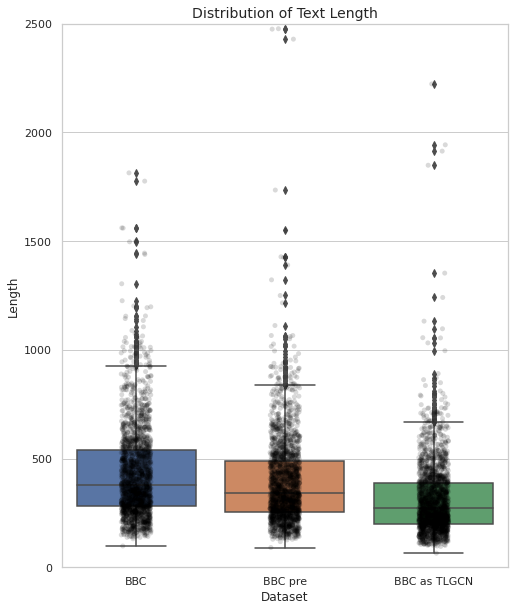

In [74]:
sns.set(rc={'figure.figsize':(8,10)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=(lens_bbc, lens_bbc_cleaned, lens_bbc_cleaned_as))
ax = sns.stripplot(data=(lens_bbc, lens_bbc_cleaned, lens_bbc_cleaned_as), marker="o", alpha=0.15, color="black")
ax.axes.set_title("Distribution of Text Length", fontsize=14)
ax.set_xlabel("Dataset", fontsize=12)
ax.set_ylabel("Length", fontsize=12)
ax.set_ylim(0,2500)
ax.set_xticklabels(('BBC','BBC pre','BBC as TLGCN'))
plt.show()

### Hyperpartisan

In [32]:
data_hyp = load_dataset('hyperpartisan_news_detection', 'byarticle')

Reusing dataset hyperpartisan_news_detection (/home/mbugueno/.cache/huggingface/datasets/hyperpartisan_news_detection/byarticle/1.0.0/7f4215b0474950ddf516e806400ab81d098b3da3b3a919a13cd1a4cf2c677012)
100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 239.25it/s]


In [35]:
df_train_hyp=from_dataset2df("hyperpartisan_news_detection", data_hyp['train'], ['text', 'hyperpartisan'])
df_train_hyp.head()

,content,label
261,"<p>Jul 1, 2017 at 3:15 PM</p> \n<p>The progres...",1
260,<p>Donald Trump's campaign manager Kellyanne C...,1
595,<p>Hillary Clinton crawled back into the spotl...,1
104,<p>CNN's Don Lemon called President Trump a li...,1
5,"<p>Briefly: In our opinion, full (150% of the ...",1


In [36]:
df_train_hyp.shape

(645, 2)

In [37]:
print ("Total samples:\n", df_train_hyp.shape[0])
print ("\nLabel distribution:\n", Counter(df_train_hyp['label']))
tokenized_hyp = [word_tokenize(sample) for sample in df_train_hyp['content']]
lens_hyp = [len(x) for x in tokenized_hyp]

hyps=np.asarray(lens_hyp)
print ("\nLength of text (w.r.t. #tokens per document):")
print ("Min:", np.min(hyps), "\tAverage:", np.mean(hyps),"\tMax:",np.max(hyps))


Total samples:
 645

Label distribution:
 Counter({0: 407, 1: 238})

Length of text (w.r.t. #tokens per document):
Min: 24 	Average: 912.413953488372 	Max: 7555


In [39]:
long= np.sum([True for lens_h in lens_hyp if lens_h > 512])
print (long)
long/len(lens_hyp)

408


0.6325581395348837

In [40]:
slong= np.sum([True for lens_h in lens_hyp if lens_h > 1024])
print (slong)
slong/len(lens_hyp)

192


0.29767441860465116

In [41]:
start = time.time()

voc_text=set()
tokenized_hyp_set=[set(text) for text in tokenized_hyp]
for text in tokenized_hyp_set:
    voc_text = voc_text | set(text)

print ("\nVocabulary size (nltk):", len(voc_text))

end = time.time()
total_time = end - start
print("\nRunning time: "+ str(total_time))


Vocabulary size (nltk): 33730

Running time: 0.45914673805236816


In [106]:
from preprocessing import * 
from joblib import Parallel, delayed

cleaned = Parallel(n_jobs=-1)(delayed(clean_text)(document) for document in df_train_hyp['content'])
tokenized_hyp_cleaned = [word_tokenize(document) for document in cleaned]
        
lens_hyp_cleaned = [len(x) for x in tokenized_hyp_cleaned]

hyps_pro=np.asarray(lens_hyp_cleaned)
print ("\nLength of text (w.r.t. #tokens per document):")
print ("Min:", np.min(hyps_pro), "\tAverage:", np.mean(hyps_pro),"\tMax:",np.max(hyps_pro))

start = time.time()

voc_text_pro=set()
tokenized_hyp_set_pro=[set(text) for text in tokenized_hyp_cleaned]
for text in tokenized_hyp_set_pro:
    voc_text_pro = voc_text_pro | set(text)

print ("\nVocabulary size preprocessed text (nltk):", len(voc_text_pro))

end = time.time()
total_time = end - start
print("\nRunning time: "+ str(total_time))


Length of text (w.r.t. #tokens per document):
Min: 19 	Average: 724.8310077519379 	Max: 6685

Vocabulary size preprocessed text (nltk): 25464

Running time: 0.1963489055633545


In [107]:
cleaned = Parallel(n_jobs=-1)(delayed(clean_text)(document, as_TLGCN=True) for document in df_train_hyp['content'])
tokenized_hyp_cleaned_as = [word_tokenize(document) for document in cleaned]
        
lens_hyp_cleaned_as = [len(x) for x in tokenized_hyp_cleaned_as]

hyps_pro=np.asarray(lens_hyp_cleaned_as)
print ("\nLength of text (w.r.t. #tokens per document):")
print ("Min:", np.min(hyps_pro), "\tAverage:", np.mean(hyps_pro),"\tMax:",np.max(hyps_pro))

start = time.time()

voc_text_pro=set()
tokenized_hyp_set_pro=[set(text) for text in tokenized_hyp_cleaned_as]
for text in tokenized_hyp_set_pro:
    voc_text_pro = voc_text_pro | set(text)

print ("\nVocabulary size preprocessed text as Text Level GCN (nltk):", len(voc_text_pro))

end = time.time()
total_time = end - start
print("\nRunning time: "+ str(total_time))


Length of text (w.r.t. #tokens per document):
Min: 13 	Average: 563.8604651162791 	Max: 5293

Vocabulary size preprocessed text as Text Level GCN (nltk): 22762

Running time: 0.16666889190673828


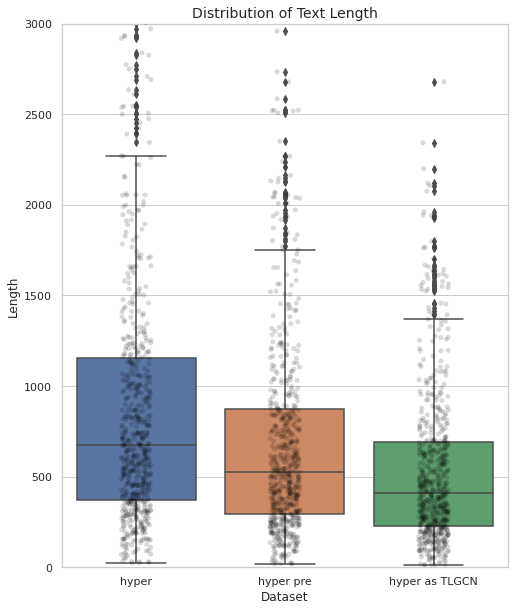

In [110]:
sns.set(rc={'figure.figsize':(8,10)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=(lens_hyp, lens_hyp_cleaned, lens_hyp_cleaned_as))
ax = sns.stripplot(data=(lens_hyp, lens_hyp_cleaned, lens_hyp_cleaned_as), marker="o", alpha=0.15, color="black")
ax.axes.set_title("Distribution of Text Length", fontsize=14)
ax.set_xlabel("Dataset", fontsize=12)
ax.set_ylabel("Length", fontsize=12)
ax.set_ylim(0,3000)
ax.set_xticklabels(('hyper','hyper pre','hyper as TLGCN'))
plt.show()

### Comparison

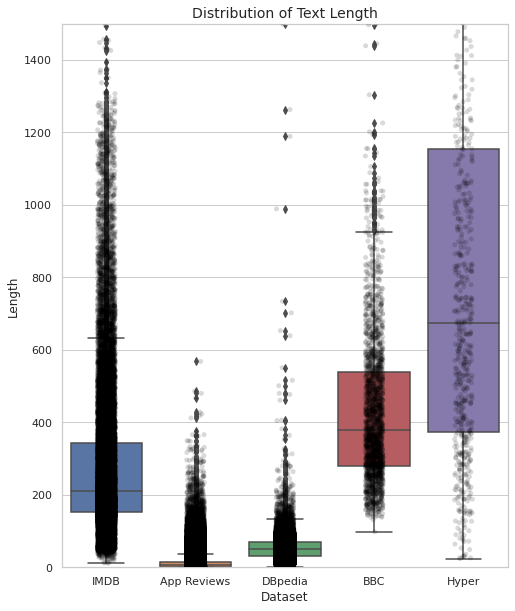

In [115]:
lens_imdb=np.load('LengthOfText_imdb.npy')
lens_app=np.load('LengthOfText_app.npy')
lens_db=np.load('LengthOfText_db.npy')

sns.set(rc={'figure.figsize':(8,10)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=(lens_imdb, lens_app, lens_db, lens_bbc, lens_hyp))
ax = sns.stripplot(data=(lens_imdb, lens_app, lens_db, lens_bbc, lens_hyp), marker="o", alpha=0.15, color="black")
ax.axes.set_title("Distribution of Text Length", fontsize=14)
ax.set_xlabel("Dataset", fontsize=12)
ax.set_ylabel("Length", fontsize=12)
ax.set_ylim(0,1500)
ax.set_xticklabels(('IMDB','App Reviews','DBpedia', 'BBC', 'Hyper'))
plt.show()